In [1]:
from wilcoxon import *
import pandas as pd
from tqdm import tqdm
import json
import os
import requests
import ast

In [2]:
busStops = []
starting = 0
while True:
    print(starting)
    try:
        headers = {'AccountKey':'XaA8uKDzTjevY+gR1sjz0A=='}
        results = requests.get('http://datamall2.mytransport.sg/ltaodataservice/http://datamall2.mytransport.sg/ltaodataservice/PV/ODBus?date=201901',headers=headers).text
        results = json.loads(results)
        if len(results['value']) == 0:
            break
        busStops.extend(results['value'])
        starting += 500
    except: break


0


In [3]:
results = []
headers = {'AccountKey':'XaA8uKDzTjevY+gR1sjz0A=='}
for i in range(1,13):
    if i < 10: i = f"0{str(i)}"
    else: i = str(i)
    r = requests.get(f'http://datamall2.mytransport.sg/ltaodataservice/PV/ODBus?Date=201901',headers=headers).text
    results.append(r)
    results.append(ast.literal_eval(r)["value"][0]["Link"])

SyntaxError: unexpected EOF while parsing (<unknown>, line 0)

In [4]:
results

['']

In [5]:
requests.get(f'http://datamall2.mytransport.sg/ltaodataservice/PV/ODBus?Date=201901',headers=headers)

<Response [404]>

In [13]:
ast.literal_eval(results)["value"][0]["Link"]

'https://ltafarecard.s3.ap-southeast-1.amazonaws.com/202104/origin_destination_bus_202104.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEAkaDmFwLXNvdXRoZWFzdC0xIkgwRgIhALB%2F9hmKAkzRlM5sQTRzQIr0RwECM9dJNqjQbpEZgOgrAiEAtq3AXYOhdpdC5eqh6O2QSo1rP8rNSj%2Fe3Xx5CpMQ1y0qrAMIov%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARACGgwzNDA2NDUzODEzMDQiDI0cdUy5UJ1uAZ7PVCqAA5JXjC9lKluBAedZxYBE2JM4C1lLLjmB%2BwPni2kQa7acXqge0axexiEDS8fVKzDxpAvqr9VGxKG7MLycPTSmGfmHGkXkEaOeFMASbDm%2FmU2gInHhCoiVMQv7Idn1aH4QjUGS29uM9pcFLii0k9V4SL5LjPj5oPC7ZiUicnIoh89cyXuyrNLJEjE5FNm7g74TJ8NdwS7PadXMK5lastQDLEnLBJn2Khq5cebtccYjNz%2BjpiJVjk%2FQNoMY8R6Rc%2FN2FCWcRlXN%2BMCUOAIX7BmKWUhPUpyMAeEaO3eeX6VF1oiY9hEUGOO7YLU%2BcMacHmXGpekpbTTo7OlAJTC2zrjIZ%2BITBS6VrKMpdYlzREI7Hh8YWBpmE4FHH%2Brr1s0X9emnPf1aISQEbzUt3uk9Zi8zpYOxs%2Fynl4XE5PHgPx1xDrqcEHlCA7PxKC2h%2Fd4yNbZod%2FU610YF7ztkxt7OZwyzSYZjzL%2FEP3PwAJLW85dPxgjGZdPuOjJkW%2Bb0qcXOaO2cKTCG552FBjrqAZaQ6BuWxHIFo01XzAsbs%2FX8%2FqiHye4XEwYHbME%2B91KWiHa%2FHQYgaPA6BkTeycr9mqQWmKoGMTer2gjcUna%2F04%2FtKqfGfjmzK

In [168]:
images = requests.get('http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2',headers=headers).text
images

'{"odata.metadata":"http://datamall2.mytransport.sg/ltaodataservice/$metadata#Traffic-Imagesv2","value":[{"CameraID":"1001","Latitude":1.29531332,"Longitude":103.871146,"ImageLink":"https://dm-traffic-camera-itsc.s3.amazonaws.com/2020-10-06/09-39/1001_0933_20201006093950_fe0944.jpg?x-amz-security-token=IQoJb3JpZ2luX2VjELr%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaDmFwLXNvdXRoZWFzdC0xIkYwRAIgSFTWR9D%2F4iDB9U58eWpvgctqWvrrOYV6p90TvPs2mFcCICM0X5BGmqMO8pI%2B2at0UFTM2runx8IBt17KBLdX5xCVKqwDCOP%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEQAhoMMzQwNjQ1MzgxMzA0Igy91J5xKeE%2BMlLJwXQqgAPLXi2lq1DKMjT8r%2BiyElFZ%2BRpVKyFqLtuEj55vVdVj8VXvc5sFx1eOHcJ2BV8ZjlCVvkZVtBQS2o7Di3EE5zfLzTSPOrqxdh9Pm0k6Rinoo7%2FJ9uGG4%2FEZQITSUpy7g%2F50pgZOSjXt%2Fi%2FALEijQHDmLzXFqIxNy3SyzXP8VnCz9UxzRjTwnuQQ8bzzNU0NLD3r3zhC1fKhlafjciOwPXkNKkDKKoGpFby%2Bj4ZV0yNjXpchJNko7FmbI5WrsAlqBdX8knvDuppVrgC7fSl87hea2A946PeSq1savPpFYPyHmkTLa42PnQbVtZNJu8t3WEFBSpH8Dj8WKPbvCbzZeNHtpL5raGHnfqLU29XW5kawaTQv7kRpNm7N%2BYU3Rad7MvNsH0IsmzdaXSh0N6zfK5YFHgnW2MhxwJeezhBi

In [122]:
import geopandas as gpd
from tqdm import tqdm

In [124]:
geospatials = os.listdir('Documents/Geospatial/Geospatial/')
geospatialsDict = {}
failures = []
for geospatial in tqdm(geospatials):
    try: geospatialsDict[geospatial.split('_')[0]] = gpd.read_file('Documents/Geospatial/Geospatial/' + geospatial + '/' + geospatial.split('_')[0] + '.shp')
    except: failures.append(geospatial)

100%|██████████| 38/38 [00:34<00:00,  1.12it/s]


In [108]:
gdf = gpd.read_file('Documents/Geospatial/Geospatial/RoadSectionLine_Jan2020/RoadSectionLine.shp')
gdf2 = gpd.read_file('Documents/Geospatial/Geospatial/SchoolZone_Feb2019/SchoolZone.shp')
# gdf = gdf.to_crs({'init': 'epsg:26920'})


<AxesSubplot:>

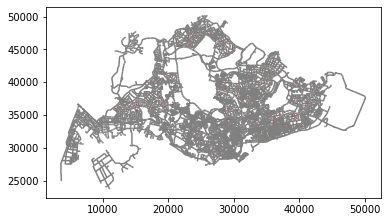

In [115]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
gdf.plot(ax=ax,color='grey',zorder=1)
gdf2.plot(ax=ax,color='red',zorder=2)

<AxesSubplot:>

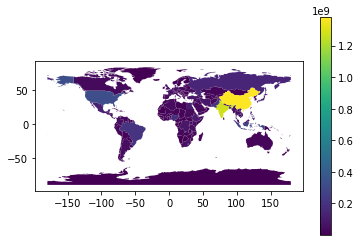

In [91]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.plot(column='pop_est',legend=True)

In [100]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
